In [2]:
import numpy as np
#导入pyplot模块
import matplotlib.pyplot as plt

#使用中文字体
import matplotlib as mpl
from statsmodels.discrete.discrete_margins import margeff

mpl.rcParams['font.family']=['Microsoft Yahei', 'sans-serif']
mpl.rcParams['axes.unicode_minus']=False

#使用svg格式，避免图形模糊
#自动显示图形
%matplotlib inline
%config InlineBackend.figure_format="svg"

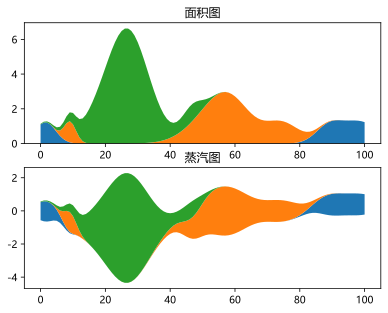

In [11]:
# Fixing random state for reproducibility
np.random.seed(19680801)


def gaussian_mixture(x, n=5):
    """Return a random mixture of *n* Gaussians, evaluated at positions *x*."""
    def add_random_gaussian(a):
        amplitude = 1 / (.1 + np.random.random())
        dx = x[-1] - x[0]
        x0 = (2 * np.random.random() - .5) * dx
        z = 10 / (.1 + np.random.random()) / dx
        a += amplitude * np.exp(-(z * (x - x0))**2)
    a = np.zeros_like(x)
    for j in range(n):
        add_random_gaussian(a)
    return a


x = np.linspace(0, 100, 101)
ys = [gaussian_mixture(x) for _ in range(3)]

fig, axis = plt.subplots(2,1)
axis[0].stackplot(x, ys)
axis[0].set_title("面积图")
axis[1].stackplot(x, ys, baseline='weighted_wiggle')
axis[1].set_title("蒸汽图")
plt.show()